In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("../data/movie_ratings.csv")
df.head()

,user_id,movie_id,rating,timestamp,age,gender,occupation,zip_code,title,year,decade,genres,rating_year
0,196,242,3,1997-12-04 15:55:49,49,M,writer,55105,Kolya (1996),1996.0,1990.0,Comedy,1997
1,186,302,3,1998-04-04 19:22:22,39,F,executive,00000,L.A. Confidential (1997),1997.0,1990.0,Crime,1998
2,186,302,3,1998-04-04 19:22:22,39,F,executive,00000,L.A. Confidential (1997),1997.0,1990.0,Film-Noir,1998
3,186,302,3,1998-04-04 19:22:22,39,F,executive,00000,L.A. Confidential (1997),1997.0,1990.0,Mystery,1998
4,186,302,3,1998-04-04 19:22:22,39,F,executive,00000,L.A. Confidential (1997),1997.0,1990.0,Thriller,1998


Genre Breakdown for Ratings

<Axes: title={'center': 'Ratings per Genre'}, xlabel='genres_list'>

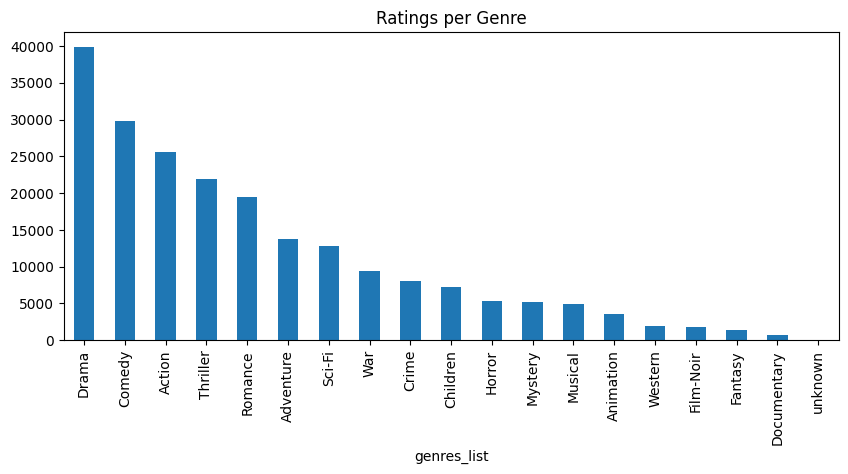

In [2]:
df["genres_list"] = df["genres"].fillna("").apply(lambda x: [g.strip() for g in str(x).split("|") if g.strip()])
exp = df.explode("genres_list")

genre_counts = exp.groupby("genres_list")["rating"].count().sort_values(ascending=False)
genre_counts.plot(kind="bar", figsize=(10,4), title="Ratings per Genre")

<Axes: title={'center': 'Number of Ratings per Genre'}, xlabel='Number of Ratings', ylabel='Genre'>

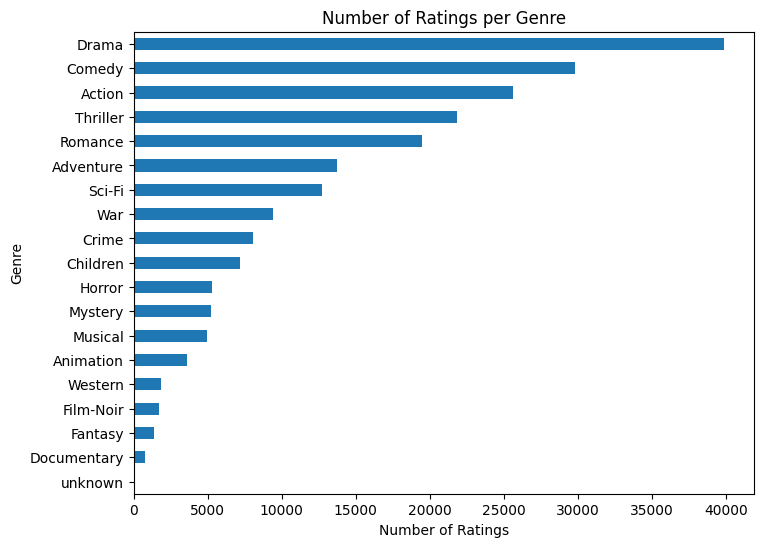

In [ ]:
df["genres_list"] = df["genres"].fillna("").apply(
    lambda x: [g.strip() for g in str(x).split("|") if g.strip()]
)
exp = df.explode("genres_list")

genre_counts = (
    exp.groupby("genres_list")["rating"]
    .count()
    .sort_values(ascending=True))

genre_counts.plot(
    kind="barh",
    figsize=(8,6),
    title="Number of Ratings per Genre",
    xlabel="Number of Ratings",
    ylabel="Genre"
)

Mean Rating By Genre

<Axes: title={'center': 'Highest Rated Genres (Satisfaction)'}, xlabel='Mean Rating (1–5)', ylabel='Genre'>

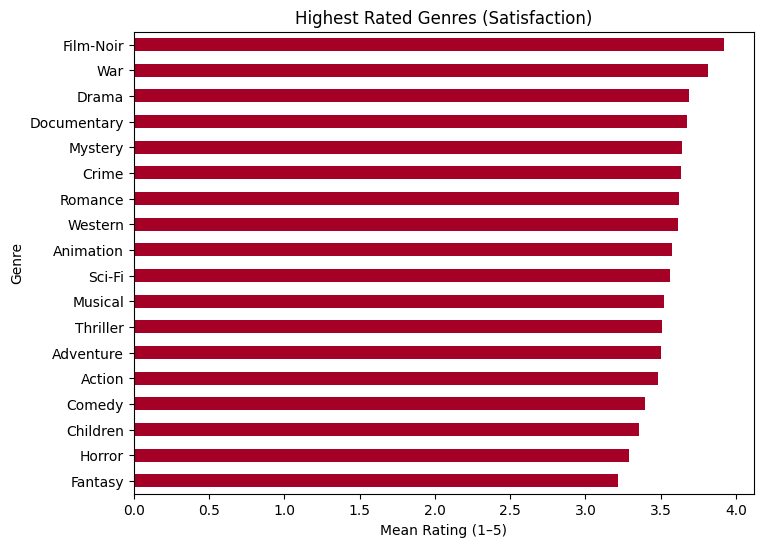

In [ ]:
gm = exp.groupby("genres_list")["rating"].agg(['mean','count'])
gm_thr = gm[gm["count"] >= 50].sort_values("mean")
gm_thr["mean"].plot(kind="barh", figsize=(8,6), cmap="RdYlGn",
                    title="Highest Rated Genres (Satisfaction)",
                    xlabel="Mean Rating (1–5)", ylabel="Genre")

 By using n > or equal to 50, the averages across all generes are narrowed down to uniform sample size.

Mean Rating in relation to the Release Year

<Axes: title={'center': 'Mean Rating vs Release Year'}, xlabel='year'>

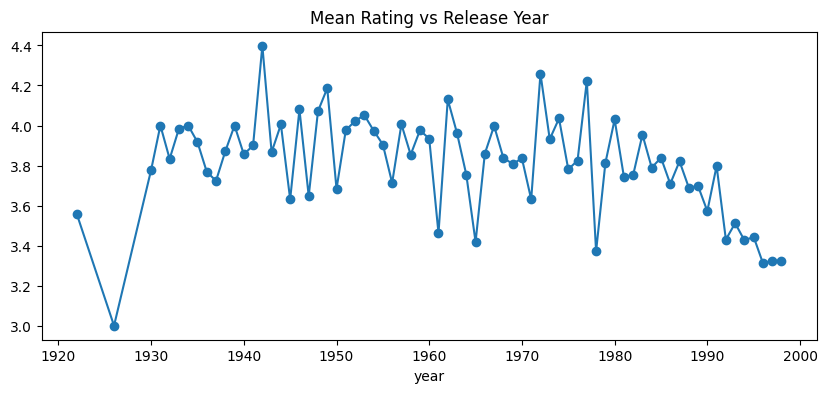

In [6]:
ys = df.groupby("year")["rating"].mean()
ys.plot(marker="o", figsize=(10,4), title="Mean Rating vs Release Year")

Top Movies by Averages: Analyze how there are changes based on if we make the sample size 50 vs 150.

In [7]:
movie_stats = df.groupby("title")["rating"].agg(["mean","count"])
top_50 = movie_stats[movie_stats["count"] >= 50].sort_values("mean", ascending=False).head(10)
top_150 = movie_stats[movie_stats["count"] >= 150].sort_values("mean", ascending=False).head(10)
top_50, top_150

(                                                        mean  count
 title                                                              
 Close Shave, A (1995)                               4.491071    336
 Schindler's List (1993)                             4.466443    596
 Wrong Trousers, The (1993)                          4.466102    236
 Casablanca (1942)                                   4.456790    729
 Wallace & Gromit: The Best of Aardman Animation...  4.447761     67
 Shawshank Redemption, The (1994)                    4.445230    283
 Rear Window (1954)                                  4.387560    418
 Usual Suspects, The (1995)                          4.385768    534
 Star Wars (1977)                                    4.358491   2915
 12 Angry Men (1957)                                 4.344000    125,
                                       mean  count
 title                                            
 Close Shave, A (1995)             4.491071    336
 Schindler's List 